In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

from sklearn.model_selection import train_test_split

In [40]:
train = pd.read_csv("C:/Users/freta/Desktop/SPB_PROJECT/train.csv")
weather=pd.read_csv("C:/Users/freta/Desktop/SPB_PROJECT/weather.csv")

tr_drop = ['Trap', 'AddressNumberAndStreet', 'Address', 'Block', 'Street', 'Latitude', 'Longitude', 'AddressAccuracy']

train_6 = train.drop(tr_drop, axis=1)

wth_drop = ['CodeSum', 'Water1', 'SnowFall', 'Depth']

weather_18 = weather.drop(wth_drop, axis=1)
weather_18.PrecipTotal.replace('  T', '0.001', inplace=True)

to_num = weather_18.columns.drop(['Station', 'Date', 'Tmax', 'Tmin', 'DewPoint', 'ResultSpeed', 'ResultDir'])
weather_18[to_num] = weather_18[to_num].apply(pd.to_numeric, errors='coerce')

weather_avrg=weather_18.groupby('Date').mean()
weather_avrg=weather_avrg.drop('Station', axis=1)
weather_avrg.StnPressure.fillna(weather_avrg.StnPressure.mean(), inplace=True)

In [41]:
df_merged = train_6.merge(weather_avrg, on='Date')
df_merged.shape
df_merged['WnvPresent'] = df_merged['WnvPresent'].apply(pd.to_numeric, errors='coerce')
df_merged.columns
df_merged.shape

(10506, 20)

# Summary Statistics

In [7]:
df_merged.describe()

,NumMosquitos,WnvPresent,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,12.853512,0.052446,81.917095,63.647202,73.022463,2.740244,59.673853,64.809109,0.886208,8.908671,468.457263,1870.854559,0.145704,29.281112,29.960729,5.941238,17.639397,7.453531
std,16.133816,0.222936,8.272718,7.487112,7.463420,6.486468,7.809328,6.702969,2.697403,5.712730,45.512954,63.177046,0.323239,0.113619,0.116844,2.837126,8.994549,2.503952
min,1.000000,0.000000,57.500000,42.500000,51.000000,-12.000000,39.000000,47.000000,0.000000,0.000000,416.000000,1720.000000,0.000000,28.920000,29.595000,0.600000,1.000000,2.400000
25%,2.000000,0.000000,78.000000,59.500000,70.000000,-2.000000,54.500000,61.500000,0.000000,5.000000,429.000000,1832.000000,0.000000,29.200000,29.880000,4.000000,10.000000,5.750000
50%,5.000000,0.000000,83.000000,65.500000,74.500000,4.000000,60.000000,66.000000,0.000000,9.500000,449.000000,1907.000000,0.000000,29.295000,29.970000,5.650000,19.000000,7.000000
75%,17.000000,0.000000,88.000000,69.500000,78.500000,8.000000,66.500000,69.500000,0.000000,13.500000,514.000000,1924.000000,0.130000,29.365000,30.050000,7.850000,24.500000,9.350000
max,50.000000,1.000000,96.500000,77.500000,85.500000,18.000000,73.000000,76.000000,14.000000,20.500000,557.000000,1931.000000,2.420000,29.620000,30.330000,15.000000,36.000000,15.650000


In [357]:
# 1. majority of the columns mean except ('DewPoint', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed') 
# is different from the median represented by the 50%
# 2. there is notably large difference between mean and 75 percentile in 'Heat', 'NumMosquitos', 'PrecipTotal'

# Therefore, we can understand that there are outliers in these variables stated above.

In [8]:
# To be more specific let's check the difference b/n the 95th percentile and maximum value, and
# 5th percentile and minimum value

df_merged.quantile([0.0, 0.05, 0.95, 1.0])

# 1) There is big difference between 95 percentile and maximum value for 'Heat', 'PrecipTotal', & 'ResultSpeed'. 
# This indicstes the presence of outliers in these three variables.
# 2) There is no big difference between the 5th percentile and minimum value for all the variables

,NumMosquitos,WnvPresent,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0.00,1.0,0.0,57.5,42.5,51.0,-12.0,39.0,47.0,0.0,0.0,416.0,1720.0,0.000,28.920,29.595,0.6,1.0,2.40
0.05,1.0,0.0,63.5,48.0,56.5,-8.0,45.0,50.5,0.0,0.0,416.0,1744.0,0.000,29.105,29.760,2.0,4.0,3.90
0.95,50.0,1.0,91.5,73.0,81.5,12.0,70.5,74.0,8.5,16.5,542.0,1931.0,0.685,29.440,30.130,10.7,31.5,11.20
1.00,50.0,1.0,96.5,77.5,85.5,18.0,73.0,76.0,14.0,20.5,557.0,1931.0,2.420,29.620,30.330,15.0,36.0,15.65


# Understanding Target variable

In [42]:
df_merged.WnvPresent.unique()

# This is our target variable. It is a categorical variable with 0 representing no WNV and
# 1 representing presence of WNV in the mosquito.

df_merged.WnvPresent.value_counts()

# This can tell us that we only have few observations for 1 (positive) as compared to 0 (negative). Hence, we are having an imbalanced dataset. 
# We will consider this later in the machine learning part.

0    9955
1     551
Name: WnvPresent, dtype: int64

# Extracting Features from 'Date' Variable 

#### -The 'Date' variable itself is not helpful for our machine learning. However, we can extract many variables such as  'Day_of_week', 'Day_of_year', 'Week_of_year', 'Month', and 'Quarter' that can be important to our prediction model.

In [43]:

# Extract the day of week from the Date 
df_merged['Day_of_week'] = pd.DatetimeIndex(df_merged['Date']).dayofweek

# Extract the day of year from the Date 
df_merged['Day_of_year'] = pd.DatetimeIndex(df_merged['Date']).dayofyear

# Extract the month from the Date 
df_merged['Week_of_year'] = pd.DatetimeIndex(df_merged['Date']).week

# Extract the month from the Date 
df_merged['Month'] = pd.DatetimeIndex(df_merged['Date']).month 

# Extract the month from the Date 

df_merged['Quarter'] = pd.DatetimeIndex(df_merged['Date']).quarter

# df_merged.info()

In [44]:
# Once we extract the above five features from the 'Date' variable, Let's remove the 'Date' variable as it is not necessary anymore. 
df_time = df_merged.drop('Date', axis=1)

df_time.WnvPresent.value_counts()

0    9955
1     551
Name: WnvPresent, dtype: int64

# To check Outliers

In [20]:
box = ['NumMosquitos', 'Tmax', 'Tmin', 'Tavg', 'Depart','DewPoint', 'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed']
dfcol=df_merged[box]

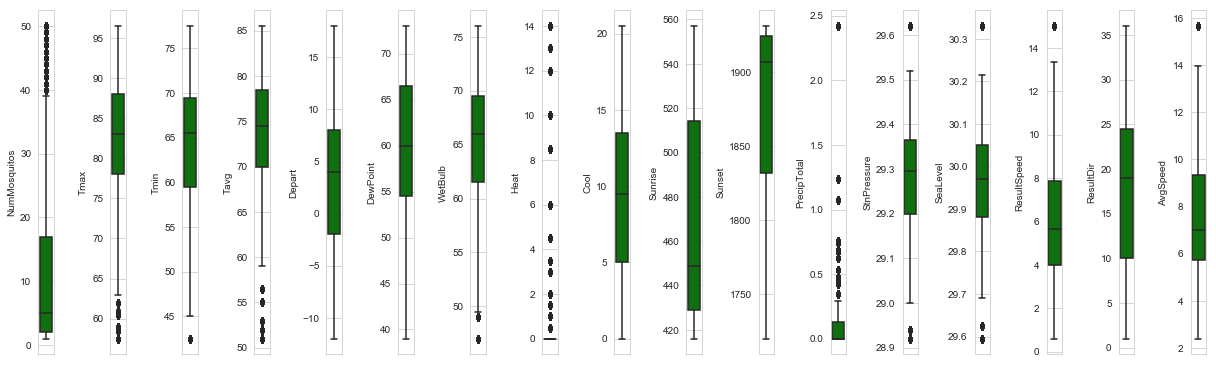

In [21]:
cols = dfcol.columns.values

number_of_columns=17
number_of_rows = len(cols)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(cols)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(dfcol[cols[i]],color='green',orient='v')
    plt.tight_layout()

In [421]:
# The black dot above or below the whiskers indicate the presence of outlier. 
# 'DewPoint', 'Cool', 'Sunrise', 'Sunset', & 'ResultDir' are the features without outliers. All other columns shows outliers.

# To check distribution-Skewness

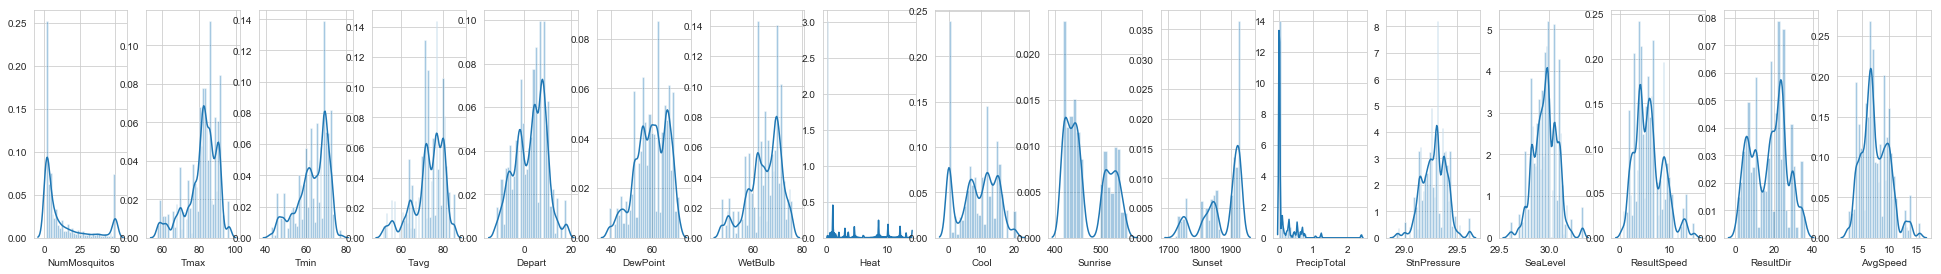

In [166]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(cols)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(dfcol[cols[i]],kde=True)

In [101]:
# 'StnPressure', and 'SeaLevel' appear to be normally distributed.
# 'Cool', 'SunSet', 'ResultSpeed', and 'ResultDir' appear to be multimodal while 
# 'Sunrise', 'NumMosquitos', and 'WetBulb' appear to be bimodal.
# 'PrecipTotal', 'Heat', and'NumMosquitos'are extremely skewed to the right.
# The rest features are slightly skewed to either right or left


# VISUAL EDA OF EACH FEATURES WITH THE TARGET VARIABLE

Text(0.5, 1.0, 'Frequency of trapped mosquitos by Month')

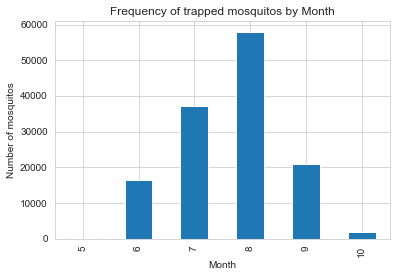

In [443]:
df_time.groupby(['Month'])['NumMosquitos'].sum().plot.bar()
plt.ylabel('Number of mosquitos')
plt.title('Frequency of trapped mosquitos by Month')

Text(0.5, 1.0, 'WNV positivity rate by Month')

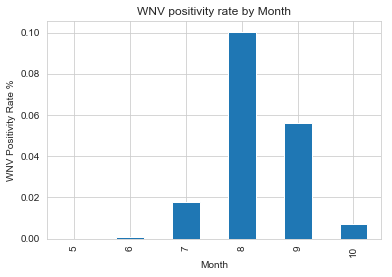

In [444]:
df_time.groupby(['Month'])['WnvPresent'].mean().sort_values(ascending=False)


df_time.groupby(['Month'])['WnvPresent'].mean().plot.bar()
plt.ylabel('WNV Positivity Rate %')
plt.title('WNV positivity rate by Month')

Text(0.5, 1.0, 'WNV positivity rate by Quarter')

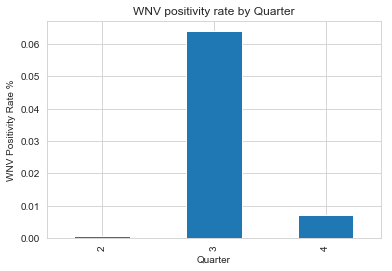

In [450]:
df_time.groupby(['Quarter'])['WnvPresent'].mean().plot.bar()
plt.ylabel('WNV Positivity Rate %')
plt.title('WNV positivity rate by Quarter')

Text(0.5, 1.0, 'WNV positivity rate by Month')

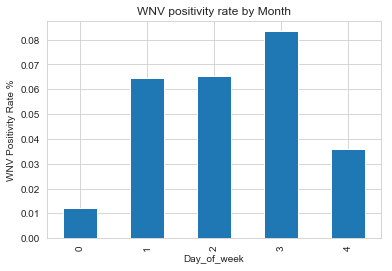

In [442]:
df_time.groupby(['Day_of_week'])['WnvPresent'].mean().plot.bar()
plt.ylabel('WNV Positivity Rate %')
plt.title('WNV positivity rate by Day_of_week')

Text(0.5, 1.0, 'WNV positivity rate by Day_of_year')

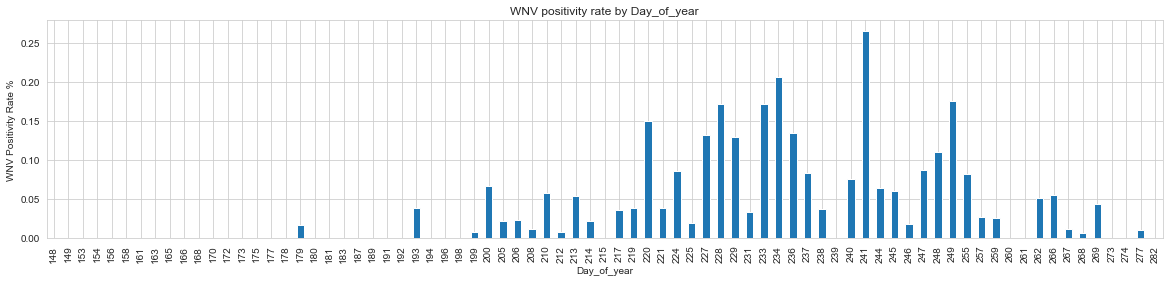

In [451]:
plt.figure(figsize=(20,4))
df_time.groupby(['Day_of_year'])['WnvPresent'].mean().plot.bar()
plt.ylabel('WNV Positivity Rate %')
plt.title('WNV positivity rate by Day_of_year')

Text(0.5, 1.0, 'WNV positivity rate by Week_of_year')

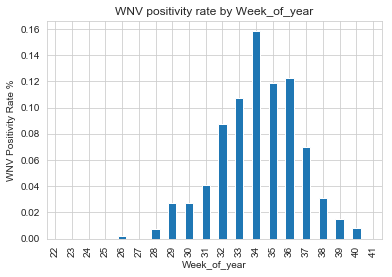

In [452]:
df_time.groupby(['Week_of_year'])['WnvPresent'].mean().plot.bar()
plt.ylabel('WNV Positivity Rate %')
plt.title('WNV positivity rate by Week_of_year')


### - From the above six barcharts we can understand that WNV positivity rate is high in the third quarter, during  August and September, which is in line with time of year when mosquito populations will be largest (August, July, June & September). 
### On top of that, WNV positivity rate is high in thirsday, tuesday and wednesday. However, we don't have any data that was aquired during the weekends(Saturday, and sunday). Mosquito traps were done from monday to friday only.

Text(0.5, 1.0, 'WNV positivity frequency by Species')

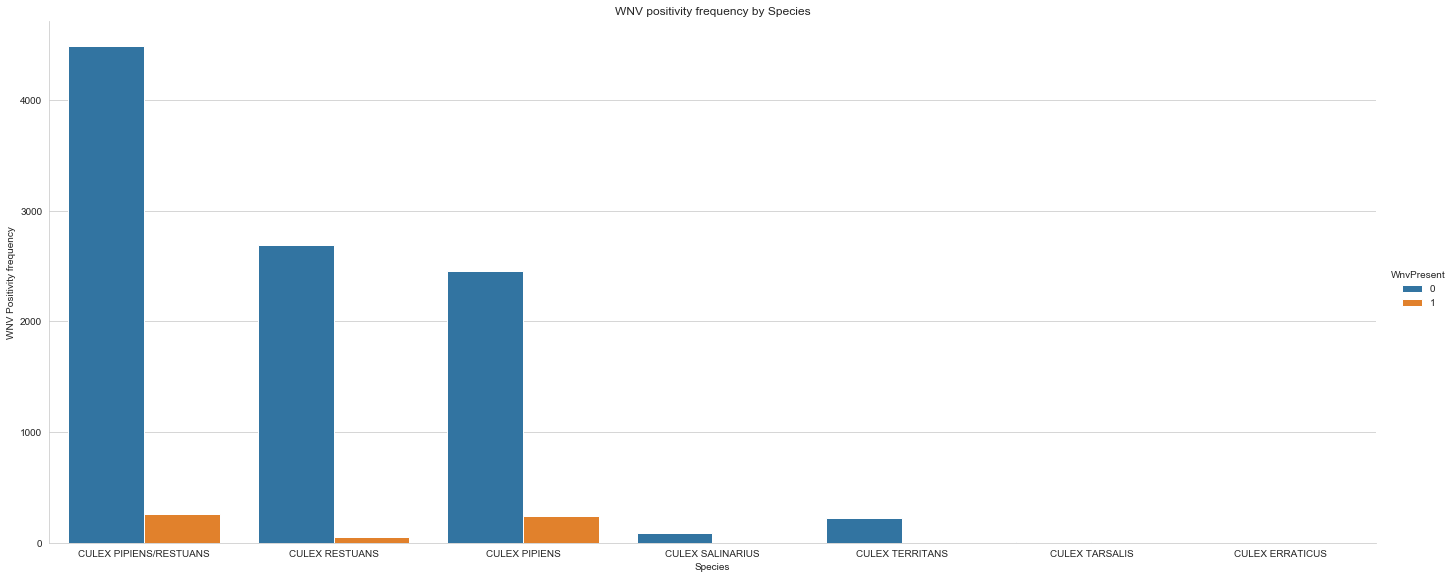

In [455]:
df_time.groupby(['Species'])['WnvPresent'].sum().sort_values(ascending=False)


sns.catplot(x='Species', hue='WnvPresent', data = df_time, kind='count', height=8, aspect=2.4)
plt.ylabel('WNV Positivity frequency')
plt.title('WNV positivity frequency by Species')

### - The above figure illustrates the number of mosquitos found in traps that contain West Nile Virus grouped by species. Knowing which species are more likely to carry the virus will be useful if the species tend to exist in different areas. CULEX PIPIENS/RESTUANS  (262), CULEX PIPIENS (240), & CULEX RESTUANS (49) were the only species carrying WNV. 
### - Later in the machine learning part, we will filter  our dataset to these three species only since the rest species have null value and as a result have no relevance in building  prediction model.

Text(0.5, 1.0, 'WNV positivity rate by Total number of mosquitos')

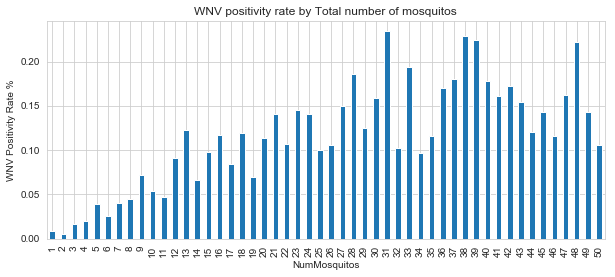

In [458]:
df_time.groupby(['NumMosquitos'])['WnvPresent'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,4))
df_time.groupby(['NumMosquitos'])['WnvPresent'].mean().plot.bar()
plt.ylabel('WNV Positivity Rate %')
plt.title('WNV positivity rate by Total number of mosquitos')




### - The above chart depicts that as the number of trapped mosquitoes increase WNV positivity rate also increases. This finding is straight forward that the more sample we have the more variety of mosquto species we get and consequently we will have more WNV positivity rate.

Text(0.5, 1.0, 'WNV positive frequency by Max temperature')

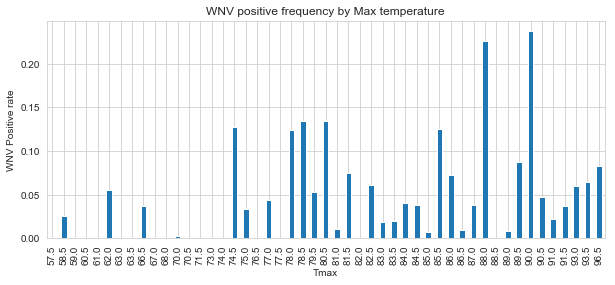

In [463]:
df_time.groupby(['Tmax'])['WnvPresent'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,4))

df_time.groupby(['Tmax'])['WnvPresent'].mean().plot.bar()
plt.ylabel('WNV Positive rate')
plt.title('WNV positive frequency by Max temperature')


Text(0.5, 1.0, 'WNV positivity rate by Minimum temperature')

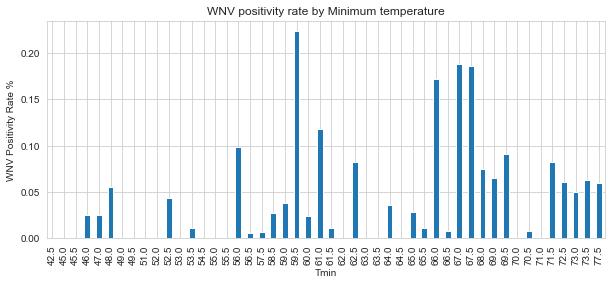

In [464]:

df_time.groupby(['Tmin'])['WnvPresent'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,4))
df_time.groupby(['Tmin'])['WnvPresent'].mean().plot.bar()
plt.ylabel('WNV Positivity Rate %')
plt.title('WNV positivity rate by Minimum temperature')

Text(0.5, 1.0, 'WNV positivity rate by Average Temperature')

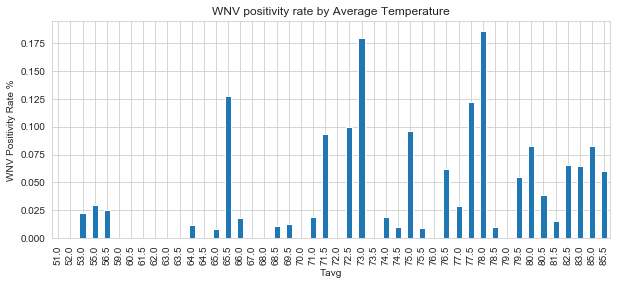

In [466]:
df_time.groupby(['Tavg'])['WnvPresent'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,4))

df_time.groupby(['Tavg'])['WnvPresent'].mean().plot.bar()
plt.ylabel('WNV Positivity Rate %')
plt.title('WNV positivity rate by Average Temperature')

Text(0.5, 1.0, 'WNV positivity rate by Departure from normal temperature')

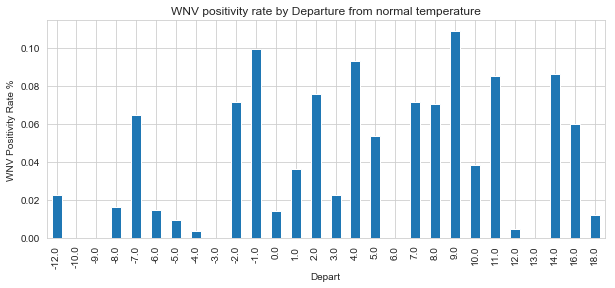

In [467]:
df_time.groupby(['Depart'])['WnvPresent'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,4))

df_time.groupby(['Depart'])['WnvPresent'].mean().plot.bar()
plt.ylabel('WNV Positivity Rate %')
plt.title('WNV positivity rate by Departure from normal temperature')

### -The above four charts illustrates that as the temperature increases the the positivity rate for WNV  also increases. This could be explained by the fact that hot and dry conditions are more favorable for West Nile virus than cold and wet.

Text(0.5, 1.0, 'WNV positivity rate by DewPoint')

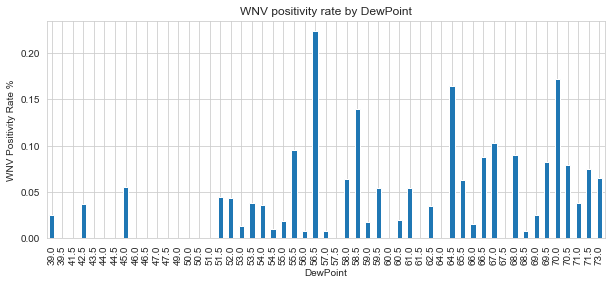

In [468]:
df_time.groupby(['DewPoint'])['WnvPresent'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,4))

df_time.groupby(['DewPoint'])['WnvPresent'].mean().plot.bar()
plt.ylabel('WNV Positivity Rate %')
plt.title('WNV positivity rate by DewPoint')

Text(0.5, 1.0, 'WNV positivity rate by Wetbulb')

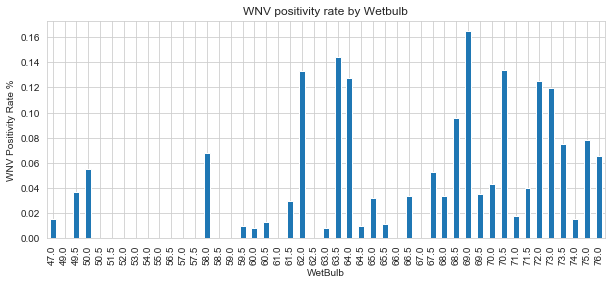

In [469]:
df_time.groupby(['WetBulb'])['WnvPresent'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,4))
df_time.groupby(['WetBulb'])['WnvPresent'].mean().plot.bar()
plt.ylabel('WNV Positivity Rate %')
plt.title('WNV positivity rate by Wetbulb')

### - The distribution of WNV positivity rate over 'DewPoint' and 'WetBulb' is similar. This may indicate these two variables may be highly correlated. Besides, the positivity rate for WNV increases with both 'DewPoint' and 'WetBulb'. 
### - The possible explanation for the association between Wet bulb and WNV  is that,  Wet bulbis an indicator of evaporation rate, thus decreases in moisture, thus less mositure tends to be favourable for West Nile virus. 

Text(0.5, 1.0, 'WNV positivity rate by Heat')

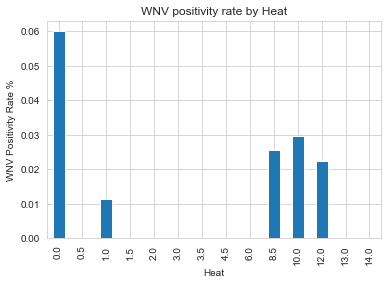

In [470]:
df_time.groupby(['Heat'])['WnvPresent'].mean().sort_values(ascending=False)

df_time.groupby(['Heat'])['WnvPresent'].mean().plot.bar()
plt.ylabel('WNV Positivity Rate %')
plt.title('WNV positivity rate by Heat')

Text(0.5, 1.0, 'WNV positivity rate by Coolling degree day')

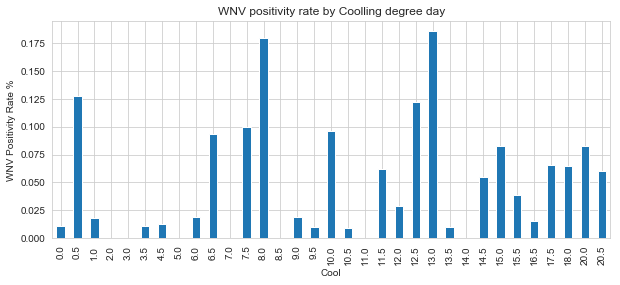

In [471]:
df_time.groupby(['Cool'])['WnvPresent'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,4))
df_merged.groupby(['Cool'])['WnvPresent'].mean().plot.bar()
plt.ylabel('WNV Positivity Rate %')
plt.title('WNV positivity rate by Coolling degree day')

### - WNV  positivity is associated with low heating days and high cooling days. low heating days and high cooling days are an indication of hot weather which is favorable to the WNV growth.
### - Majority of the WNV  positivity rates occured at 0.00 heating degree days.

Text(0.5, 1.0, 'WNV positivity rate by Sunrise')

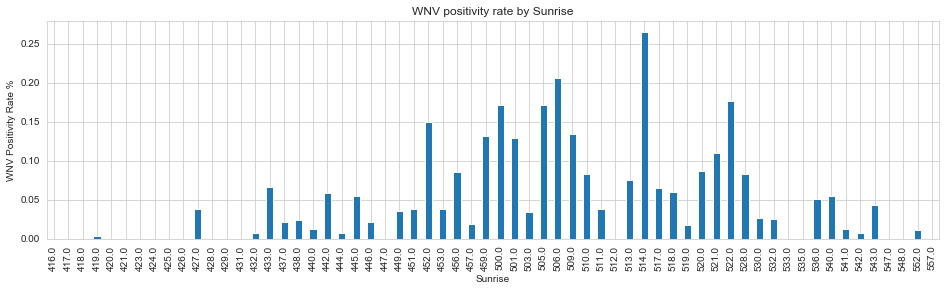

In [473]:
df_time.groupby(['Sunrise'])['WnvPresent'].mean().sort_values(ascending=False)
plt.figure(figsize=(16,4))
df_time.groupby(['Sunrise'])['WnvPresent'].mean().plot.bar() 
plt.ylabel('WNV Positivity Rate %')
plt.title('WNV positivity rate by Sunrise')

### - There is high positivity rate when the value of sunrise is in the range of 459 to 530.

Text(0.5, 1.0, 'WNV positivity rate by Sunset')

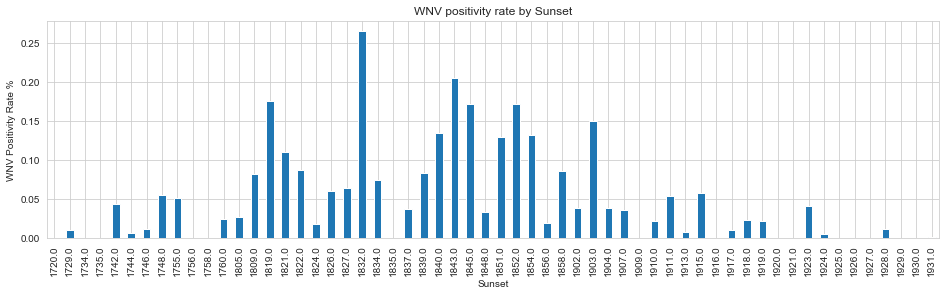

In [475]:
df_time.groupby(['Sunset'])['WnvPresent'].mean().sort_values(ascending=False)

plt.figure(figsize=(16,4))
df_time.groupby(['Sunset'])['WnvPresent'].mean().plot.bar()
plt.ylabel('WNV Positivity Rate %')
plt.title('WNV positivity rate by Sunset')

### - There is high positivity rate when the value of sunset is in the range of 1809 to 1903.

Text(0.5, 1.0, 'WNV positivity rate by Total Precipitation')

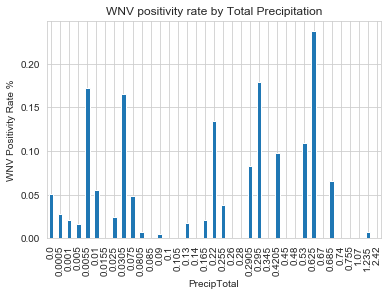

In [477]:
df_time['PrecipTotal'] = df_time['PrecipTotal'].round(decimals=5) 

df_time.groupby(['PrecipTotal'])['WnvPresent'].mean().sort_values(ascending=False)

df_time.groupby(['PrecipTotal'])['WnvPresent'].mean().plot.bar()
plt.ylabel('WNV Positivity Rate %')
plt.title('WNV positivity rate by Total Precipitation')

### - The WNV positivity rate increases slightly with total precipitation, though the data looks bimodal. Precipitation represents an increase in moisture, which can be favourable weather condition for the growth of mosquito population.

Text(0.5, 1.0, 'WNV positivity rate by Station Pressure')

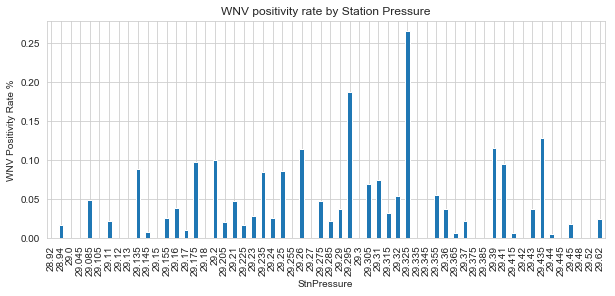

In [478]:
df_time['StnPressure'] = df_time['StnPressure'].round(decimals=7) 
df_time.groupby(['StnPressure'])['WnvPresent'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,4))
df_time.groupby(['StnPressure'])['WnvPresent'].mean().plot.bar()
plt.ylabel('WNV Positivity Rate %')
plt.title('WNV positivity rate by Station Pressure')

Text(0.5, 1.0, 'WNV positivity rate by SeaLevel Pressure')

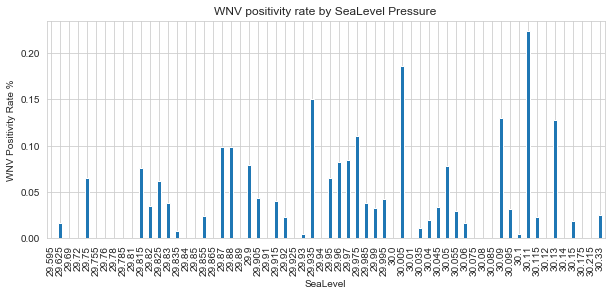

In [479]:
df_time['SeaLevel'] = df_time['SeaLevel'].round(decimals=7)

df_time.groupby(['SeaLevel'])['WnvPresent'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,4))
df_time.groupby(['SeaLevel'])['WnvPresent'].mean().plot.bar()
plt.ylabel('WNV Positivity Rate %')
plt.title('WNV positivity rate by SeaLevel Pressure')

### -From the above two charts we can understand that there is more WNV positivity rate as the 'SeaLevel' pressure and 'StnPressure' increases

Text(0.5, 1.0, 'WNV positivity rate by Result Speed')

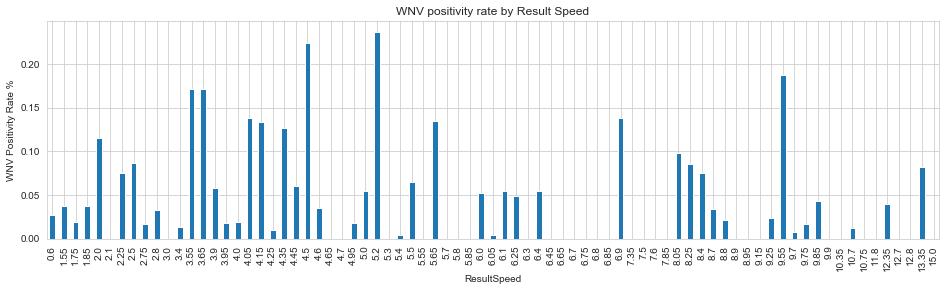

In [480]:
df_time['ResultSpeed'] = df_time['ResultSpeed'].round(decimals=5)
df_time.groupby(['ResultSpeed'])['WnvPresent'].mean().sort_values(ascending=False)
plt.figure(figsize=(16,4))
df_time.groupby(['ResultSpeed'])['WnvPresent'].mean().plot.bar()
plt.ylabel('WNV Positivity Rate %')
plt.title('WNV positivity rate by Result Speed')

Text(0.5, 1.0, 'WNV positivity rate by result direction')

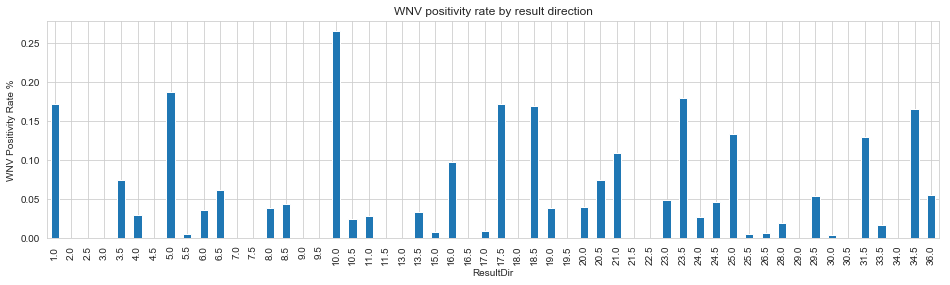

In [481]:
df_time.groupby(['ResultDir'])['WnvPresent'].mean().sort_values(ascending=False)
plt.figure(figsize=(16,4))
df_time.groupby(['ResultDir'])['WnvPresent'].mean().plot.bar()
plt.ylabel('WNV Positivity Rate %')
plt.title('WNV positivity rate by result direction')

Text(0.5, 1.0, 'WNV positivity rate by Average Speed')

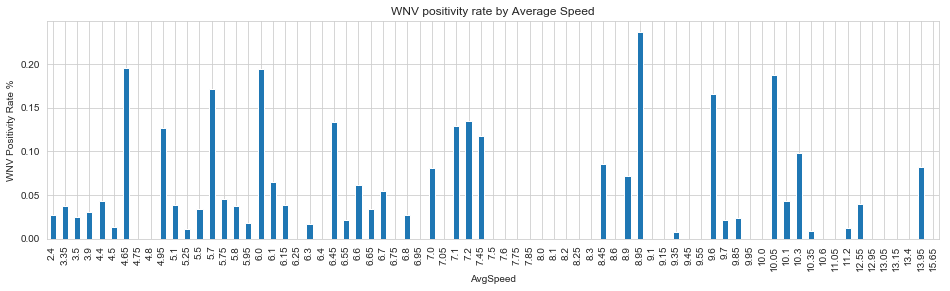

In [482]:
df_time['AvgSpeed'] = df_time['AvgSpeed'].round(decimals=5)
df_time.groupby(['AvgSpeed'])['WnvPresent'].mean().sort_values(ascending=False)
plt.figure(figsize=(16,4))
df_time.groupby(['AvgSpeed'])['WnvPresent'].mean().plot.bar()
plt.ylabel('WNV Positivity Rate %')
plt.title('WNV positivity rate by Average Speed')

### - From the above three charts we can infer that WNV positivity rate is evenly distributed across 'ResultSpeed', 'ResultDir', 'AvgSpeed'.



# To Handle Outliers

In [45]:
num_df = df_time.select_dtypes(include=["number"])
cat_df = df_time.select_dtypes(exclude=["number"]) 

Q1 = num_df.quantile(0.05)
Q3 = num_df.quantile(0.95)
IQR = Q3 - Q1

idx = ~((num_df < (Q1 - 1.5 * IQR)) | (num_df > (Q3 + 1.5 * IQR))).any(axis=1)
wnv_cleaned = pd.concat([num_df.loc[idx], cat_df.loc[idx]], axis=1)


wnv_cleaned.WnvPresent.value_counts()
wnv_cleaned.shape


(10413, 24)

#### - 107 rows with outliers (Q1 < 0.05 or Q3 > 0.95)  were removed from our original data frame.

#### - We used the boundry of 5th percentile and 95th percentile because it is the maximum interval that includes all the WNV positives. 

#### - We tried to use different intervals such as 25th and 75th percentile, 10th and 90th percentile, but all of them excludes all the 551 WNV positives which inturn would make prediction impossible. 


# Filtering the Dataframe Based on the Value 'Species' Column

#### - We have seven species of Culex mosquitoes, namely 'CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',   'CULEX SALINARIUS', 'CULEX TERRITANS',  'CULEX TARSALIS', and  'CULEX ERRATICUS'. 

#### - Out of which only three species (CULEX PIPIENS/RESTUANS (262), CULEX PIPIENS (240), & CULEX RESTUANS (49) ) were carrying WNV. The rest four species have null value for WNV positivity. 

#### - Hence, we will be forced to remove these four species as they have no relevance to our prediction algorithm.



In [88]:
wnv_cleaned.Species.unique()

df_filtered = wnv_cleaned[(wnv_cleaned.Species == 'CULEX PIPIENS/RESTUANS') | (wnv_cleaned.Species == 'CULEX PIPIENS') | 
                  (wnv_cleaned.Species == 'CULEX RESTUANS')]

df_filtered.Species.unique()

df_filtered.WnvPresent.value_counts()

df_filtered.shape
# df_filtered.info()
# 865 observations are filtered out 

# Finaly our dataframe 10085 rows, and 51 columns. All the features except 'Species' are floats and ints. 
df_filtered.columns
# df_filtered.head()

Index(['NumMosquitos', 'WnvPresent', 'Tmax', 'Tmin', 'Tavg', 'Depart',
       'DewPoint', 'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset',
       'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir',
       'AvgSpeed', 'Day_of_week', 'Day_of_year', 'Week_of_year', 'Month',
       'Quarter', 'Species'],
      dtype='object')

# FEATURE ENGINEERING

In [89]:
# let's create 1-14 lag variables for each of the 16 weather variables

cols =['Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset',  
       'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed']

time = range(1, 15)

df_lag = df_filtered.assign(**{'{} (lag_{})'.format(col, t): df_filtered[col].shift(t)
    for t in time
    for col in cols
})

df_lag.shape

# We have a total of 10099 rows and 248 columns


# The next step is to fill the nan values of the lag variable by their respective column median

# columns to be dropped i.e. that doesn't need fillna

org_cols =['Species', 'NumMosquitos', 'WnvPresent', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint', 
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'PrecipTotal', 'StnPressure', 'SeaLevel', 
       'ResultSpeed', 'ResultDir', 'AvgSpeed', 'Day_of_week', 'Day_of_year', 'Week_of_year', 'Month', 'Quarter']


fill_cols = df_lag.drop(org_cols, axis=1).columns       # columns to be filled

len(fill_cols)      # check that the number of lag variables are 224


for col in fill_cols:
    df_lag[col].fillna(df_lag[col].median(), inplace=True)
    
    
df_lag.isnull().any().sum()   # chech whether the nan values are filled completely worked very well

df_lag.head()
df_lag.shape

(10099, 248)

# Undersampling

In [48]:
df_lag.WnvPresent.value_counts()
# Since the propotion of WNV positives is 5.45%, our dataset is imbalanced. Hence in order to balance it, 
# we will use undersampling so that we can have a ratio 1 WNV positive to 4 WNV negatives. 

# 1. Find Number of samples which are WNV negatives which is four times that of WNV positives

len_no_wnv = (len(df_lag[df_lag.WnvPresent == 1])) * 4

# 2. Get indices of WNV negatives
no_wnv_indices = df_lag[df_lag.WnvPresent == 0].index

# 3. Random sample WNV negatives without replacement by making the replace option equal to False
random_indices = np.random.choice(no_wnv_indices, len_no_wnv, replace = False)

# 4. Get indices of WNV positives
wnv_indices = df_lag[df_lag.WnvPresent == 1].index

# 5. Concatenate indices of WNV negatives and WNV positives
under_sample_indices = np.concatenate([random_indices, wnv_indices])

# 6. Finally get Balance Dataframe
df_balanced = df_lag.loc[under_sample_indices]


df_balanced.shape            # We finally got 2755 rows and 248 columns

df_balanced.WnvPresent.value_counts()  # The total WNV positives (551) and WNV negatives(2204) is now in a ratio of 1:4

0    2204
1     551
Name: WnvPresent, dtype: int64

## Visualising Undersampled Data

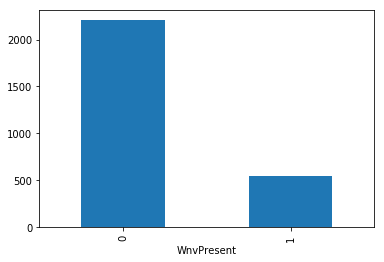

In [49]:
df_balanced.groupby(['WnvPresent'])['WnvPresent'].count().plot.bar()

# Handling Categorical Variables

In [50]:
# We have one categorical variable ('Species') that needs to be converted by using pandas get dummies   
# before we proceed to the machine learning part. 

df_dumy=pd.get_dummies(df_balanced)

df_dumy.shape
# df_dumy.head()

(2755, 250)

# Train Test Split

In [51]:

y = df_dumy['WnvPresent']
X = df_dumy.drop('WnvPresent', axis=1)

# let's split our data in to train(70%) and test (30)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)


# (X_train.shape, X_test.shape) , (y_train.shape, y_test.shape)
# X_train.columns

train_df = pd.concat([X_train, y_train], axis=1 )

train_df.head()
train_df.shape
# X_train.shape

(1928, 250)

# Attribute Relevance Analysis

In [52]:
# There are two pre-requisites for calculating the 'Information value'. 
# 1) The first one making sure that there is no missing value

train_df.isnull().any().sum()  # we don't have any missing value. We can proceed to the second pre-requisite




0

In [53]:
# 2) The second pre-requisite is thay there should not be any continuous attributes.

# We will ctegorize our variables in to either two bins or 5 bins. 'Heat', and 'PrecipTotal' can not be binned in to 
# five variables. Hence, we will bin them in two classes by using pd.cut. Initially we tried to use pd.qcut 
# but it is unable to bin it. 

dicotomy = ['Heat', 'Heat (lag_1)', 'Heat (lag_2)', 'Heat (lag_3)', 'Heat (lag_4)', 'Heat (lag_5)', 'Heat (lag_6)',
'Heat (lag_7)', 'Heat (lag_8)', 'Heat (lag_9)', 'Heat (lag_10)', 'Heat (lag_11)', 'Heat (lag_12)', 'Heat (lag_13)',
'Heat (lag_14)', 'PrecipTotal', 'PrecipTotal (lag_1)', 'PrecipTotal (lag_2)', 'PrecipTotal (lag_3)', 'PrecipTotal (lag_4)', 
'PrecipTotal (lag_5)', 'PrecipTotal (lag_6)', 'PrecipTotal (lag_7)', 'PrecipTotal (lag_8)', 'PrecipTotal (lag_9)', 
 'PrecipTotal (lag_10)', 'PrecipTotal (lag_11)', 'PrecipTotal (lag_12)', 'PrecipTotal (lag_13)', 'PrecipTotal (lag_14)']



df_bin_cut = train_df.assign(**{'{}'.format(col): pd.cut(train_df[col], 2, duplicates='drop')
    for col in dicotomy
})




In [90]:
# The  rest valriables will be grouped in to five bins using pd.qcut

catg=['NumMosquitos', 'Day_of_week', 'Day_of_year', 'Week_of_year', 'Month', 'Quarter', 'WnvPresent', 'Heat', 'Heat (lag_1)', 'Heat (lag_2)', 'Heat (lag_3)', 'Heat (lag_4)', 'Heat (lag_5)', 'Heat (lag_6)',
'Heat (lag_7)', 'Heat (lag_8)', 'Heat (lag_9)', 'Heat (lag_10)', 'Heat (lag_11)', 'Heat (lag_12)', 'Heat (lag_13)',
'Heat (lag_14)', 'PrecipTotal', 'PrecipTotal (lag_1)', 'PrecipTotal (lag_2)', 'PrecipTotal (lag_3)', 'PrecipTotal (lag_4)', 
'PrecipTotal (lag_5)', 'PrecipTotal (lag_6)', 'PrecipTotal (lag_7)', 'PrecipTotal (lag_8)', 'PrecipTotal (lag_9)', 
 'PrecipTotal (lag_10)', 'PrecipTotal (lag_11)', 'PrecipTotal (lag_12)', 'PrecipTotal (lag_13)', 'PrecipTotal (lag_14)']

qcut_five = train_df.drop(catg, axis=1).columns


df_bin_all = df_bin_cut.assign(**{'{}'.format(col): pd.qcut(df_bin_cut[col], 5, duplicates='drop')
    for col in qcut_five
})


df_binned_final = df_bin_all.select_dtypes(exclude=['float64'])

df_binned_final.shape


(1928, 250)

In [55]:
# Lets use the following function to calvculate the IV score. 


def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [56]:
# let's apply the function stated above to our binned dataframe

iv_list = []
colss=list(df_binned_final.columns)

for col in colss:
    if col == 'WnvPresent': continue
    else:
        df, iv = calculate_woe_iv(df_binned_final, col, 'WnvPresent')
        if (iv > 0.01) and (iv < 0.8):
            iv_list.append(col) 


In [100]:
len(iv_list)          # We got 199 variables with IV-score 0.01 - 0.8
# iv_list

199


# To check Correlation


In [99]:
tr_df=train_df.astype(float)
tr_df.info()

ff=abs(train_df.corr().WnvPresent)
ftr=tr_df.columns
high_cor=[]
for x in ftr:
    if abs(tr_df[x].corr(tr_df['WnvPresent'])) > 0.11:
        high_cor.append(x)

len(high_cor)     # we got 58 variables with corrolation value > 0.1
# 'WnvPresent' in high_cor



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 5750 to 10240
Columns: 250 entries, NumMosquitos to WnvPresent
dtypes: float64(250)
memory usage: 3.7 MB


74

# Feature Selection

In [101]:
# Now we will select variables with IV score between 0.01 & 0.8 as well as corrolation value > 0.11

selected_features = list(set(iv_list).union(high_cor))

len(selected_features)      


# finaly we got 72 variables with IV score between 0.01 & 0.8 as well as corrolation value > 0.11  



219

In [104]:
# remove the target variable from the dataset so that we will be left with the 'X_train' data and 
# tehn calculate the variance inflation factor

df_iv_cor = train_df[selected_features]

df_iv_cor.shape

df_iv_cor_trainx = df_iv_cor.drop('WnvPresent', axis=1)

df_iv_cor_trainx.shape

(1928, 218)

# Variance Inflation Factor (VIF)

In [105]:
# import the necessary tools from statsmodels that helps us to calculate the VIF.

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# By using the folloeing function we will calculate the VIF for each features

#####
def iterate_vif(df, vif_threshold=5, max_vif=6):
  count = 0
  while max_vif > vif_threshold:
    count += 1
    print("Iteration # "+str(count))
    vif = pd.DataFrame()
    vif["VIFactor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["features"] = df.columns
    
    if vif['VIFactor'].max().round(1) > vif_threshold:
      print('Removing %s with VIF of %f' % (vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], vif['VIFactor'].max().round(1)))
      df = df.drop(vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], axis=1)
      max_vif = vif['VIFactor'].max().round(1)
    else:
        print('Complete')
        return df, vif.sort_values('VIFactor').round(1)
    
  #####  

In [62]:
# apply the above function to caculate and select features with VIF of <=5.

vif_val = df_iv_cor_trainx._get_numeric_data()
final_df, final_vif = iterate_vif(vif_val)

Iteration # 1


C:\Users\freta\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Removing Depart (lag_6) with VIF of inf
Iteration # 2
Removing Heat (lag_4) with VIF of inf
Iteration # 3
Removing Tavg (lag_10) with VIF of inf
Iteration # 4
Removing Tavg (lag_14) with VIF of inf
Iteration # 5
Removing Heat (lag_12) with VIF of inf
Iteration # 6
Removing Tavg (lag_2) with VIF of inf
Iteration # 7
Removing Heat (lag_6) with VIF of inf
Iteration # 8
Removing Tavg (lag_3) with VIF of inf
Iteration # 9
Removing Cool (lag_11) with VIF of inf
Iteration # 10
Removing Cool (lag_7) with VIF of inf
Iteration # 11
Removing Tavg (lag_1) with VIF of inf
Iteration # 12
Removing Cool (lag_5) with VIF of inf
Iteration # 13
Removing Heat (lag_8) with VIF of inf
Iteration # 14
Removing Heat (lag_13) with VIF of inf
Iteration # 15
Removing Cool with VIF of inf
Iteration # 16
Removing Tavg (lag_9) with VIF of 239318760.200000
Iteration # 17
Removing StnPressure (lag_12) with VIF of 44815949959.400002
Iteration # 18
Removing SeaLevel (lag_1) with VIF of 25046087604.400002
Iteration # 19


Removing DewPoint (lag_11) with VIF of 12321.600000
Iteration # 128
Removing DewPoint (lag_4) with VIF of 11304.200000
Iteration # 129
Removing Cool (lag_2) with VIF of 10124.800000
Iteration # 130
Removing AvgSpeed (lag_12) with VIF of 9824.700000
Iteration # 131
Removing Cool (lag_9) with VIF of 9733.200000
Iteration # 132
Removing Tmin (lag_14) with VIF of 8748.700000
Iteration # 133
Removing AvgSpeed (lag_8) with VIF of 7644.100000
Iteration # 134
Removing AvgSpeed (lag_3) with VIF of 7603.300000
Iteration # 135
Removing AvgSpeed (lag_13) with VIF of 6167.200000
Iteration # 136
Removing Cool (lag_3) with VIF of 5748.200000
Iteration # 137
Removing DewPoint (lag_7) with VIF of 5556.800000
Iteration # 138
Removing Cool (lag_12) with VIF of 4668.000000
Iteration # 139
Removing AvgSpeed (lag_10) with VIF of 4246.700000
Iteration # 140
Removing AvgSpeed (lag_2) with VIF of 3587.100000
Iteration # 141
Removing Cool (lag_8) with VIF of 3508.700000
Iteration # 142
Removing AvgSpeed (lag_5)

In [106]:
final_df.head()
# finaly we got 8 features with VIF <=5 ('NumMosquitos', 'Species_CULEX PIPIENS', 'ResultDir (lag_14)', 
# 'Species_CULEX RESTUANS', 'Depart (lag_13)', 'Day_of_week', 'ResultSpeed', 'Heat')

,NumMosquitos,Species_CULEX PIPIENS,ResultDir (lag_14),Species_CULEX RESTUANS,Depart (lag_13),Day_of_week,ResultSpeed,Heat
5750,3,0,23.0,0,7.0,3,3.95,3.0
433,4,1,30.0,0,-3.0,2,9.70,0.0
902,17,0,11.0,0,8.0,2,2.80,0.0
6201,5,0,6.5,1,2.0,4,5.55,0.0
10377,2,1,16.0,0,14.0,3,8.05,0.0


In [113]:
# Since some of the features are uint8 and int64 we changed their dtype to float so that they can be 
# suitable for our prediction algorithms

X_train = final_df              # make copy of the dataset named X_train inorder to make it inforamtive

X_train = X_train.astype(float) # change the dtype to float

X_train.info()

X_test = X_test[X_train.columns]

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 5750 to 10240
Data columns (total 8 columns):
NumMosquitos              1928 non-null float64
Species_CULEX PIPIENS     1928 non-null float64
ResultDir (lag_14)        1928 non-null float64
Species_CULEX RESTUANS    1928 non-null float64
Depart (lag_13)           1928 non-null float64
Day_of_week               1928 non-null float64
ResultSpeed               1928 non-null float64
Heat                      1928 non-null float64
dtypes: float64(8)
memory usage: 135.6 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 827 entries, 7353 to 2073
Data columns (total 8 columns):
NumMosquitos              827 non-null float64
Species_CULEX PIPIENS     827 non-null float64
ResultDir (lag_14)        827 non-null float64
Species_CULEX RESTUANS    827 non-null float64
Depart (lag_13)           827 non-null float64
Day_of_week               827 non-null float64
ResultSpeed               827 non-null float64
Heat                      8

# Logistic Regression

In [67]:
# Import the necessary metrics and preprocessing tools

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score



0.558272239758341
0.781136638452237
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       644
           1       0.52      0.16      0.24       183

   micro avg       0.78      0.78      0.78       827
   macro avg       0.66      0.56      0.56       827
weighted avg       0.74      0.78      0.73       827



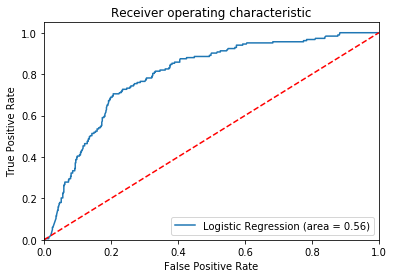

In [114]:
# Import the model we are going to use

from sklearn.linear_model import LogisticRegression

# Instantiate model and fit with the training data

log_reg=LogisticRegression(random_state=37, solver='liblinear').fit(X_train, y_train)

# predict the fitted data
y_pred_logistic = log_reg.predict(X_test)

# calculate and print the roc_auc_score, accuracy score and classification_report

print(roc_auc_score(y_test, y_pred_logistic))                #### 0.5582 ####
print(accuracy_score(y_test, y_pred_logistic))               #### 0.7811 ####
print(classification_report(y_test, y_pred_logistic))


# draw the ROC_AUC curve

logit_roc = roc_auc_score(y_test, y_pred_logistic)
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_curve')
plt.show()

In [132]:
# Calculate the Logloss for the logistic regression

proba = log_reg.predict_proba(X_test)
logloss_lr = log_loss(y_test, proba)
logloss_lr                           # 0.4516 

0.451635678429412

# KNN

In [115]:
# Import the model we are going to use

from sklearn.neighbors import KNeighborsClassifier

# Setup the pipeline steps for scaling

steps=[('scaler', StandardScaler()),
      ('knn', KNeighborsClassifier())]

pipeline=Pipeline(steps)

# Specify the hyperparameter to be tunned

parameters={'knn__n_neighbors' : [7, 8, 9, 10, 11, 12, 13, 14, 15, 16]}

# Create the GridSearchCV object

cv_knn = GridSearchCV(pipeline, param_grid=parameters, cv=5)

#  Fit to the training set

cv_knn.fit(X_train, y_train)

# predict the fitted data

y_pred_knn = cv_knn.predict(X_test)


# Compute and print metrics (roc_auc_score, accuracy score and classification_report) with the best model parameters


print(roc_auc_score(y_test, y_pred_knn))    #### 0.62393 ####

print(accuracy_score(y_test, y_pred_knn))       #### 0.7920 ####

print(classification_report(y_test, y_pred_knn))

print("Tuned Model Parameters: {}".format(cv_knn.best_params_))



0.6239351050470081
0.7920193470374849
              precision    recall  f1-score   support

           0       0.83      0.93      0.87       644
           1       0.55      0.32      0.41       183

   micro avg       0.79      0.79      0.79       827
   macro avg       0.69      0.62      0.64       827
weighted avg       0.77      0.79      0.77       827

Tuned Model Parameters: {'knn__n_neighbors': 9}


In [116]:
# Calculate the Logloss for the KNN

knn_prob = cv_knn.predict_proba(X_test)
knn_logloss = log_loss(y_test, knn_prob)
knn_logloss                                 # 0.8031


0.8031364810746022


# Random Forest Classifier


In [117]:
# Import the classifier we are going to use

from sklearn.ensemble import RandomForestClassifier

# Instantiate model 

rf = RandomForestClassifier(random_state = 42)

# Specify the hyperparameter to be tunned

rf_para={'n_estimators' : [100, 150, 200, 250],
    'max_features' : [1, 2, 3, 4, 5],
        'min_samples_split' : [16, 17, 18, 19, 20, 21, 22, 23, 24, 25]}

# Create the GridSearchCV object

cv_rf = GridSearchCV(rf, rf_para, cv=5)

#  Fit to the training set

cv_rf.fit(X_train, y_train)

# predict the fitted data

y_pred_rf = cv_rf.predict(X_test)


# Compute and print metrics (roc_auc_score, accuracy score and classification_report) with the best model parameters

print(roc_auc_score(y_test, y_pred_rf))    #### 0.6738 ####

print(accuracy_score(y_test, y_pred_rf))       #### 0.8210 ####

print(classification_report(y_test, y_pred_rf))

print("Tuned Model Parameters: {}".format(cv_rf.best_params_))


0.6738621321657672
0.8210399032648126
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       644
           1       0.65      0.41      0.50       183

   micro avg       0.82      0.82      0.82       827
   macro avg       0.75      0.67      0.70       827
weighted avg       0.80      0.82      0.81       827

Tuned Model Parameters: {'max_features': 3, 'min_samples_split': 19, 'n_estimators': 100}


In [118]:
# Calculate the Logloss for the Random Forest classifier

rf_prob = cv_rf.predict_proba(X_test)
rf_logloss = log_loss(y_test, rf_prob)
rf_logloss                                  # 0.3817


0.38172281337700964

# SVM

In [121]:
# Import the classifier we are going to use

from sklearn.svm import SVC

steps = [('scaler', StandardScaler()),
         ('SVM', SVC(probability=True))]

# Setup the pipeline steps for scaling

pipeline = Pipeline(steps)

# Specify the hyperparameter to be tunned

parameters = {'SVM__C':[1, 10, 20, 25, 30],
              'SVM__gamma':[0.1, 0.01],
             'SVM__kernel':['rbf', 'linear']}

# Create the GridSearchCV object

cv_svm = GridSearchCV(pipeline, parameters, cv=5)

#  Fit to the training set

cv_svm.fit(X_train, y_train)

# predict the fitted data

y_pred_svm = cv_svm.predict(X_test)

# Compute and print metrics (roc_auc_score, accuracy score and classification_report) with the best model parameters

print(roc_auc_score(y_test, y_pred_svm))                           #### 0.6137 #####
print(accuracy_score(y_test, y_pred_svm))                           #### 0.8004####
print(classification_report(y_test, y_pred_svm))

print("Tuned Model Parameters: {}".format(cv_svm.best_params_))
       

0.6137231442826597
0.8004836759371221
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       644
           1       0.61      0.28      0.38       183

   micro avg       0.80      0.80      0.80       827
   macro avg       0.71      0.61      0.63       827
weighted avg       0.77      0.80      0.77       827

Tuned Model Parameters: {'SVM__C': 20, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}


In [122]:
# Calculate the Logloss for the SVM


svm_prob = cv_svm.predict_proba(X_test)
svm_logloss = log_loss(y_test, svm_prob)      # 0.4504
svm_logloss

0.4504780310270436


# Extremely Randomized Trees


In [123]:
# Import the classifier we are going to use

from sklearn.ensemble import ExtraTreesClassifier

# Instantiate model 

ert = ExtraTreesClassifier(random_state = 42)

# Specify the hyperparameter to be tunned

ert_para={'n_estimators' : [50, 100, 150, 200, 250],
    'max_features' : [1, 2, 3, 4, 5],
        'min_samples_split' : [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]}

# Create the GridSearchCV object

cv_ert= GridSearchCV(ert, ert_para, cv=5)

#  Fit to the training set

cv_ert.fit(X_train, y_train)

# predict the fitted data

y_pred_ert = cv_ert.predict(X_test)

# Compute and print metrics (roc_auc_score, accuracy score and classification_report) with the best model parameters

print(roc_auc_score(y_test, y_pred_ert))   #### 0.6066 ####

print(accuracy_score(y_test, y_pred_ert))       #### 0.8016 ####
print("Tuned Model Parameters: {}".format(cv_ert.best_params_))
print(classification_report(y_test, y_pred_ert))



0.6066761701116655
0.8016928657799275
Tuned Model Parameters: {'max_features': 1, 'min_samples_split': 15, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.82      0.96      0.88       644
           1       0.63      0.26      0.36       183

   micro avg       0.80      0.80      0.80       827
   macro avg       0.72      0.61      0.62       827
weighted avg       0.78      0.80      0.77       827



In [124]:
# Calculate the Logloss for the ert

ert_prob = cv_ert.predict_proba(X_test)
ert_logloss = log_loss(y_test, ert_prob)
ert_logloss                                 # 0.3904

0.3904925644513514


# AdaBoost Classifier


In [125]:
# Import the classifier we are going to use

from sklearn.ensemble import AdaBoostClassifier

# Instantiate model 

adabc = AdaBoostClassifier(random_state = 42)

# Specify the hyperparameter to be tunned
                        
adabc_para={'n_estimators' : [100, 150, 200, 250]}

# Create the GridSearchCV object

cv_adabc= GridSearchCV(adabc, adabc_para, cv=5)

#  Fit to the training set

cv_adabc.fit(X_train, y_train)

# predict the fitted data

y_pred_adabc = cv_adabc.predict(X_test)

In [131]:
# Compute and print metrics (roc_auc_score, accuracy score and classification_report) with the best model parameters

print(roc_auc_score(y_test, y_pred_adabc))    #### 0.6633 ####

print(accuracy_score(y_test, y_pred_adabc))       #### 0.8137 ####

print(classification_report(y_test, y_pred_adabc))

print("Tuned Model Parameters: {}".format(cv_adabc.best_params_))

0.663336218307708
0.8137847642079806
              precision    recall  f1-score   support

           0       0.84      0.93      0.89       644
           1       0.63      0.39      0.48       183

   micro avg       0.81      0.81      0.81       827
   macro avg       0.74      0.66      0.68       827
weighted avg       0.80      0.81      0.80       827

Tuned Model Parameters: {'n_estimators': 200}


In [132]:
# Calculate the Logloss for the Ada_boost Classifier

adabc_prob = cv_adabc.predict_proba(X_test)
adabc_logloss = log_loss(y_test, adabc_prob)
adabc_logloss                                   # 0.6859

0.6859143849542906

# Gaussian NB

In [221]:
# Import the classifier we are going to use

from sklearn.naive_bayes import GaussianNB

# Instantiate model 

gaus = GaussianNB()

#  Fit to the training set

gaus.fit(X_train, y_train)

# predict the fitted data

y_pred_gaus=gaus.predict(X_test)

# Compute and print metrics (roc_auc_score, accuracy score and classification_report) with the best model parameters

print(roc_auc_score(y_test, y_pred_gaus))    #### 0.7123 ####

print(accuracy_score(y_test, y_pred_gaus))       #### 0.7896 ####

print(classification_report(y_test, y_pred_gaus))


0.7123510844109561
0.7896009673518742
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       644
           1       0.52      0.57      0.55       183

   micro avg       0.79      0.79      0.79       827
   macro avg       0.70      0.71      0.70       827
weighted avg       0.80      0.79      0.79       827



In [222]:
# Calculate the Logloss for the Gaussian NB


gaus_prob=gaus.predict_proba(X_test)
gaus_logloss = log_loss(y_test, gaus_prob)
gaus_logloss   

0.5425506981244398


# GradientBoosting Classifier


In [168]:
# Import the classifier we are going to use

from sklearn.ensemble import GradientBoostingClassifier

# Instantiate model 

gradb = GradientBoostingClassifier(learning_rate=0.15, n_estimators=100, max_depth=3, min_samples_leaf=3, 
                                   min_samples_split=40, random_state=37, max_features=8)

# Specify the hyperparameter to be tunned
# learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
# n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
# max_depths = np.linspace(1, 32, 32, endpoint=True)
# min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
# min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
# max_features = list(range(1, 8))

gradb_para={'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500],
            'max_depth':[2,3,4,5,6,7], 'max_features':[2,3,4,5,6,7,8], 'min_samples_split':[2,4,6,8,10,20,40,60,100], 
            'min_samples_leaf':[1,3,5,7,9]}

# Create the GridSearchCV object

cv_gradb= GridSearchCV(gradb, gradb_para, cv=5)

#  Fit to the training set

cv_gradb.fit(X_train, y_train)

# predict the fitted data

y_pred_gradb = cv_gradb.predict(X_test)

In [199]:
# Compute and print metrics (roc_auc_score, accuracy score and classification_report) with the best model parameters


print(roc_auc_score(y_test, y_pred_gradb))    #### 0.6894 ####

print(accuracy_score(y_test, y_pred_gradb))       #### 0.8270 ####

print(classification_report(y_test, y_pred_gradb))

print("Tuned Model Parameters: {}".format(cv_gradb.best_params_)) 

# finaly ('learning_rate=0.15, n_estimators=100, max_depth=3, min_samples_leaf=3,min_samples_split=40, 
# random_state=37, max_features=7 ) are the hyper-parameters selected by the gridsearchCv object.



In [223]:
# Calculate the Logloss for the Gradient Boosting Classifier

gradb_prob = cv_gradb.predict_proba(X_test)
gradb_logloss = log_loss(y_test, gradb_prob)
gradb_logloss                                  # The lowest logloss of  0.3711

# Best classifiers

#### - Out of the eight classifications algorithms we used, GradientBoosting, Random Forest, Gaussian NB,  and Ada-Boosting are the four best classifiers with best metrics. Though the Gaussian NB Classifier has the best ROC_AUC_SCORE(0.7123), its 'logloss' is larger than the logloss of GradientBoosting Classifier and Random Forest Classifier. Therefore, GradientBoosting Classifier is the one with the lowest logloss, best accuracy score and second best  ROC_AUC_SCORE (0.6859,) which makes it the best algorithm among the eight classifiers we used.

#### 1 - GradientBoosting Classifier (ROC_AUC_SCORE=0.6859, Accuracy=0.824, logloss=0.37)
#### 2 - Random Forest Classifier ( ROC_AUC_SCORE=0.6738, Accuracy=0.8210, logloss=0.38)
#### 3 - Gaussian NB Classifier (ROC_AUC_SCORE=0.7123, Accuracy=0.789, logloss=0.5425)
#### 4 - Ada-Boosting Classifier ( ROC_AUC_SCORE=0.6633, Accuracy=0.8137, logloss=0.68)


### Re-run the Gradient Boosting Algorithm Using the Selected Best Hyperparameters


0.6894791772731902
0.8270858524788391
0.3711634021613398


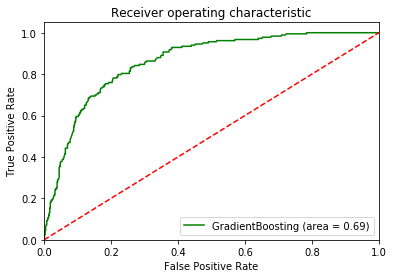

In [224]:
# let's now run the model using the selected best hyperparameters to make sure that we got same 
# result to the gridsearchcv object


# Instantiate model 

gradb0 = GradientBoostingClassifier(learning_rate=0.15, n_estimators=100, max_depth=3, min_samples_leaf=3, 
                                   min_samples_split=40, random_state=37, max_features=7)

#  Fit to the training set

gradb0.fit(X_train, y_train)

# predict the fitted data

y_pred_gradb0 = gradb0.predict(X_test)

print(roc_auc_score(y_test, y_pred_gradb0))    #### 0.6894 ####

print(accuracy_score(y_test, y_pred_gradb0))       #### 0.8270 ####

print(classification_report(y_test, y_pred_gradb0))


# Calculate the Logloss for the Gradient Boosting Classifier

gradb_prob0 =gradb0.predict_proba(X_test)
gradb_logloss0 = log_loss(y_test, gradb_prob0)
print(gradb_logloss0)                                 # 0.3711 


gradb_roc = roc_auc_score(y_test, y_pred_gradb0)
fpr, tpr, thresholds = roc_curve(y_test, gradb0.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, 'g', label='GradientBoosting (area = %0.2f)' % gradb_roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Gradient_boosting_ROC_curve')
plt.show()

### Feature Importance using Gradient Boosting Algorithm

In [209]:
for name, importance in zip(X_train.columns, gradb0.feature_importances_):
    print(name, "=", importance)
    


NumMosquitos = 0.5004028707508372
Species_CULEX PIPIENS = 0.02705345859095262
ResultDir (lag_14) = 0.09544503910616788
Species_CULEX RESTUANS = 0.026938253654067768
Depart (lag_13) = 0.12461061748921251
Day_of_week = 0.08534357911978857
ResultSpeed = 0.12709942398147833
Heat = 0.013106757307495092


### Visualizing Feature Importances using Gradient Boosting Algorithm

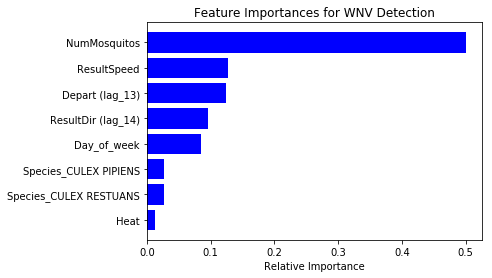

In [220]:
features = X_train.columns
importances = gradb0.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances for WNV Detection')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


# 'NumMosquitos' is the strongest feature that predicts the presence or absence of WNV in mosquito; 
# followed by ResultSpeed & Depart (lag_13). 
# While 'Heat' is the weakest feature in classifying the presence or absence of WNV in mosquito 